In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = None

df = pd.DataFrame({
    'House': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'SquareFootage': [1000, 1200, 1500, 1800, 2200, 1350, 2000, 1750, 1650, 1900, 1300, 2500, 1400, 2050, 2250, 1600, 1950, 2200, 1800, 1250],
    'Price': [100000, 150000, 200000, 250000, 300000, 175000, 225000, 210000, 195000, 240000, 160000, 325000, 170000, 235000, 275000, 190000, 230000, 300000, 250000, 145000]
})

df

,House,SquareFootage,Price
0,1,1000,100000
1,2,1200,150000
2,3,1500,200000
3,4,1800,250000
4,5,2200,300000
5,6,1350,175000
6,7,2000,225000
7,8,1750,210000
8,9,1650,195000
9,10,1900,240000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   House          20 non-null     int64
 1   SquareFootage  20 non-null     int64
 2   Price          20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [3]:
df.describe()

,House,SquareFootage,Price
count,20.00000,20.000000,20.00000
mean,10.50000,1732.500000,216250.00000
std,5.91608,405.642765,58125.88426
min,1.00000,1000.000000,100000.00000
25%,5.75000,1387.500000,173750.00000
50%,10.50000,1775.000000,217500.00000
75%,15.25000,2012.500000,250000.00000
max,20.00000,2500.000000,325000.00000


In [4]:
df = df.drop('House', axis=1)
df.head()

,SquareFootage,Price
0,1000,100000
1,1200,150000
2,1500,200000
3,1800,250000
4,2200,300000


In [5]:
from sklearn.model_selection import train_test_split

x = df['SquareFootage'].values.reshape(-1, 1)
y = df['Price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

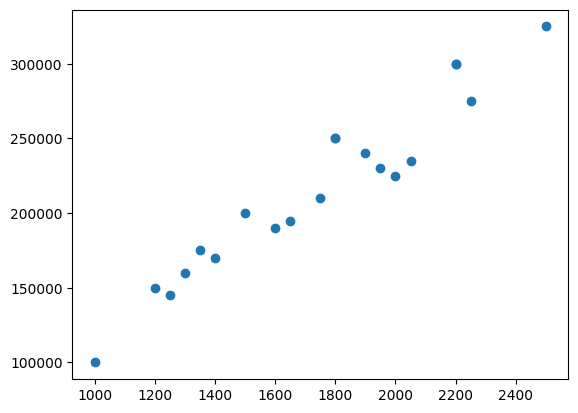

In [6]:
plt.scatter(x, y)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

score = model.score(x, y)
print('model score:', score)

model score: 0.922829113434445


In [8]:
x

array([[1000],
       [1200],
       [1500],
       [1800],
       [2200],
       [1350],
       [2000],
       [1750],
       [1650],
       [1900],
       [1300],
       [2500],
       [1400],
       [2050],
       [2250],
       [1600],
       [1950],
       [2200],
       [1800],
       [1250]], dtype=int64)

In [9]:
y

array([100000, 150000, 200000, 250000, 300000, 175000, 225000, 210000,
       195000, 240000, 160000, 325000, 170000, 235000, 275000, 190000,
       230000, 300000, 250000, 145000], dtype=int64)

In [10]:
y_pred

array([121764.70588235, 277030.92304115, 199397.81446175, 147642.40874215])

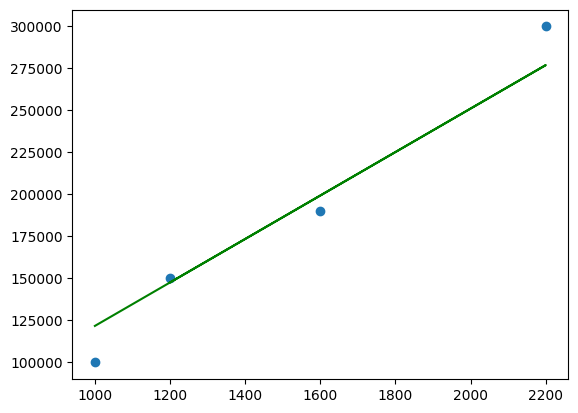

In [12]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'g')
plt.show()